In [23]:
import myLineComponents as L
import myImageProcessing as I
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

% matplotlib inline

In [24]:
def process_image(lane_img):
    
    lane_dst = cv2.undistort(lane_img, I.mtx, I.dist, None, I.mtx)
    
    # diag2
    lane_thresholded = I.thresholding(lane_dst)
    
    # diag3
    lane_warped = I.warping(lane_thresholded)
    
    # diag4
    lane_slidingwindowed = I.sliding_window_method(lane_warped)
    
    lx,rx,ly,ry,lfx,rfx,lc,rc,lr2,rr2,oc= I.findCurvature(lane_slidingwindowed)
    info = {'lc':lc, 'rc': rc, 'lr2':lr2, 'rr2': rr2, 'oc': oc}
    
    # diag5
    lane_detected = I.drawCurves(lx, rx, ly, ry, lfx, rfx)

    # diag1 
    lane_unwarped = I.unwarping(lane_dst, lane_slidingwindowed)

    # assemble diagnostic screens
    diagScreen = I.createDiagScreen(lane_unwarped, lane_thresholded, 
                                  lane_warped, lane_slidingwindowed*255,
                                  lane_detected, info)
    return diagScreen

In [25]:
lane_images = glob.glob('./project_video_frames/*.jpeg')

if not os.path.exists('./diag/'):
    os.makedirs('./diag/')

for s in lane_images:   
    result = process_image(mpimg.imread(s))
    mpimg.imsave('./diag/'+s[-20:], result)

/Users/tz/anaconda/envs/carnd-term1/lib/python3.5/site-packages/scipy/signal/_peak_finding.py:412: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


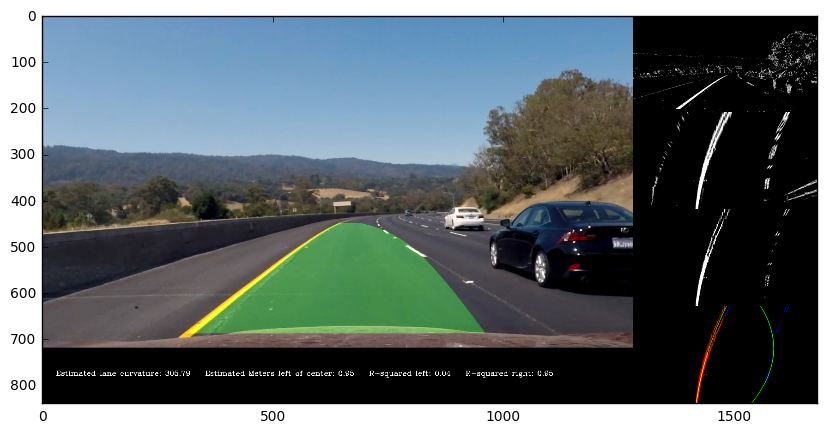

In [27]:
# Bad examples: 5
bad = ['12_26_15_521921.jpeg', '12_26_30_358526.jpeg', '12_26_51_657416.jpeg']

lane_images = glob.glob('./diag/*.jpeg')

x=[s for k, s in enumerate(glob.glob('./project_video_frames/*.jpeg')) if s.find(bad[1])>0]

lane_img = mpimg.imread(x[0])

result = process_image(lane_img)
fig = plt.figure(figsize=(10,15))
plt.imshow(result)

In [ ]:
# choose lanes closer to center (done)
# clip using center line (done)
# masking?
# diagnose weird right lane points in the left lane... 
# if bad frames don't last more than 5 frames, my last resort: use previous frames
# check r2, use the more confident one

In [ ]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image